In [1]:
# # ONLY RUN WHEN IN AZURE
# import os
# os.chdir('..')

# !pip install transformers
# !pip install -e .

Obtaining file:///mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/TrainingNLP
  Attempting uninstall: TrainingNLP
    Found existing installation: TrainingNLP 0.0.1
    Uninstalling TrainingNLP-0.0.1:
      Successfully uninstalled TrainingNLP-0.0.1
  Running setup.py develop for TrainingNLP


In [2]:
import os
import pandas as pd

from sklearn.metrics import classification_report, accuracy_score, f1_score
from transformers import pipeline

import config

# Print data example with complete content of column 'review'
pd.set_option('display.max_colwidth', None)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-18 12:07:49.857664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 12:07:50.031073: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-18 12:07:50.825336: W tensorflow/compiler/xla/stream_executor/platfor

# **Consort - Formation NLP**

## Introduction - Analyse de sentiments

Objectif: Déterminer le sentiment d'un texte à l'aide de différentes techniques.

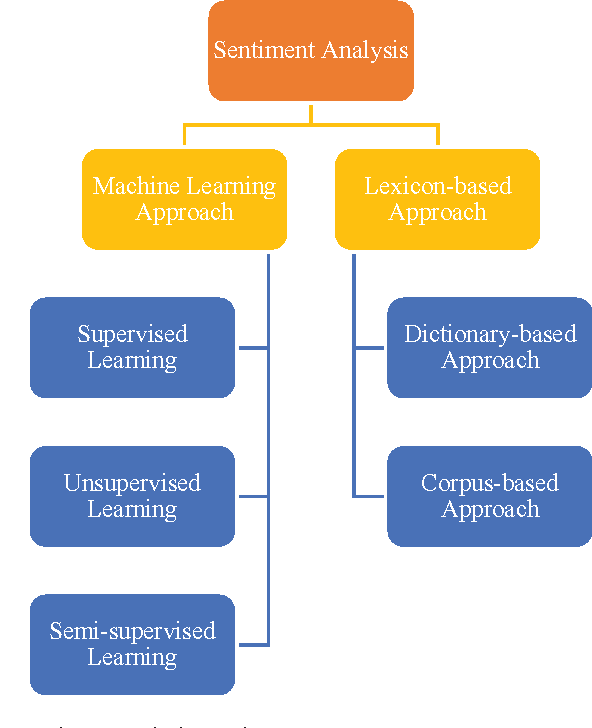






### Approche lexicale 
(*Lexicon or Rule-Based approach*)
  - RegEx
  - NLTK
  - SpaCy

### Machine Learning
  - Modèles à taille fixe
    - Bag of words
  - Modèles réccurents
    - CBOW
  - Modèles transformeurs
    - À affiner (fine-tune)
    - HuggingFace Sentiment Analysis
    - Google's API (sans création de compte)



## Données

Jeu de données pour l'analyse de sentiments: Avis des utilisateurs d'Allociné.fr disponible ici: https://github.com/TheophileBlard/french-sentiment-analysis-with-bert/tree/master/allocine_dataset

Il contient 100 000 avis positifs et 100 000 avis négatifs répartis en 3 répartitions équilibrées : train (160 000 avis), val (20 000) et test (20 000).

**NOTE:** Afin d'optimiser le temps de calcul pour cet exercice, nous allons réduire l'ensemble test 1000. 

In [3]:
# Load preprocessed test_data if previoups cells not run
test_data = pd.read_csv(config.base_dir + '/Data/prepro_test_data.csv', usecols=['ID', 'review', 'clean_review', 'polarity'])
test_data.head(6)

,ID,review,polarity,clean_review
0,0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles mel gibson heath ledger jason isaacs le genre de film qui se savoure en famille
1,1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable rien de conventionnel ici une visite e t mais jonchée d idées originales le soucis tout ceci avait il vraiment sa place dans un film de s f tirant sur l horreur voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake
2,2,Un dessin animé qui brille par sa féerie et ses chansons.,1,un dessin animé qui brille par sa féerie et ses chansons
3,3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,si c est là le renouveau du cinéma français c est tout de même foutrement chiant si l objet est très stylisé et la tension palpable le film paraît plutôt creux
4,4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,et pourtant on s en doutait second volet très mauvais sans fraîcheur et particulièrement lourdingue quel dommage
5,5,"Vous reprendrez bien un peu d'été ? Ce film je le voyais comme un mélange de Rohmer et de Rozier, un film de vacances, j'adore ça, un truc beau et pur qui dit des choses sur la vie, l'amour, les filles, les vacances. Un film qui se regarde en sirotant une boisson fraîche en écoutant les grillons ! Sauf qu'en fait non ! On a un film foutraque au possible qui reprend les codes justement de Rohmer voir Godard, enfin la Nouvelle Vague en général dans sa première partie (jusqu'à même finir sur une partie qui ressemblerait à du Kusturica), mais en beaucoup plus léger et décalé. Le film n'en a rien à foutre de rien, il ose tout, n'a peur de rien et ça c'est bon. C'est sans doute le film le plus drôle de 2013, mais tout simplement l'un des meilleurs tout court. Le film qui nous sort des dialogues qui pourraient sortir d'un mauvais Godard (oxymore) sur un ton what the fuckesque… raconte des anecdotes débiles au souhait face caméra… et pourtant, il y a quelque chose dans ce film survolté. Il y a du beau. Ces scènes dans la neige, c'est tendre, c'est beau, ça tranche avec le reste et ça donne du coeur à l'amourette, ça aide à le faire paraître comme une évidence. Et puis on a cette scène que je trouve sublime qui m'a profondément émue, cette scène où le docteur Placenta devient tout à coup sérieux et parle de cette date où chaque année il repense à cette fille et au fait qu'une année de plus le sépare d'elle. C'est horrible comme concept et pourtant tellement vrai et sincère. C'est vraiment troublant. Et encore une fois la scène d'avant est très drôle et là, un petit moment de douceur avant de repartir sur le train effréné ! Et il y a ces fesses… Et le plus beau c'est qu'à la fin Vimala Pons a un petit air d'Anna Karina ! Film fout, étonnant, percutant, drôle, beau, triste ! C'est foutrement cool !",1,vous reprendrez bien un peu d été ce film je le voyais comme un mélange de rohmer et de rozier un film de vacances j adore ça un truc beau et pur qui dit des choses sur la vie l amour les filles les vacances un film qui se regarde en sirotant une boisson fraîche en écoutant les grillons sauf qu en fait non on a un film foutraque au possible qui reprend les codes just

# Machine Learning

## Transformers - Pretrained sentiment analysis models

### Complete fine-tuned model 

In [6]:
# Using a model trained by hugging face users
complete_fine_tuned = pipeline(model='alosof/camembert-sentiment-allocine', padding=True, truncation=True)

tf_model.h5: 100%|██████████| 443M/443M [00:37<00:00, 11.7MB/s] 
2024-01-18 12:12:38.034852: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at alosof/camembert-sentiment-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.
tokenizer_config.json: 100%|██████████| 522/522 [00:00<00:00, 151kB/s]
sentencepiece.bpe.model: 100%|██████████| 811k/811k [00:00<00:00, 1.66MB/s]
tokenizer.json: 100%|██████████| 2.42M/2.42M [00:00<00:00, 5.81MB/s]
special_tokens_map.json: 100%|██████████| 354/354 [00:00<00:00, 98.3kB/s]


### Predicting on test data

In [25]:
test_data['HF_Training_complete'] = None
for i in range(0, len(test_data), 100):
    print(f'\nIteration : {i} / {len(test_data)}')
    test_data.loc[i:i+100, 'HF_Training_complete'] = test_data.loc[i:i+100, 'review'].apply(lambda rvw: 0 if complete_fine_tuned(rvw)[0]['label'] == 'LABEL_0' else 1) # 0 = negative, 1 = positive and neutral
    # Save predictions
    print(f'\nSaving predictions in {config.base_dir + "/Data/HF_Training_complete.csv"}')
    test_data.to_csv(config.base_dir + '/Data/TEMP_HF_Training_complete.csv', index=False)

# Print classification report
print(f'\nClassification Report :')
print(classification_report(test_data['polarity'], test_data['HF_Training_complete'].astype(int)))



Iteration : 0 / 1000

Saving predictions in /mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/TrainingNLP/Data/HF_Training_complete.csv

Iteration : 100 / 1000

Saving predictions in /mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/TrainingNLP/Data/HF_Training_complete.csv

Iteration : 200 / 1000

Saving predictions in /mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/TrainingNLP/Data/HF_Training_complete.csv

Iteration : 300 / 1000

Saving predictions in /mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/TrainingNLP/Data/HF_Training_complete.csv

Iteration : 400 / 1000

Saving predictions in /mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/TrainingNLP/Data/HF_Training_complete.csv

Iteration : 500 / 1000

Saving predictions in /mnt/batch/tasks/shared/LS_root/mounts/clusters/med4c32g/code/Users/nicholas.vachon/Traini

## Save results

### By example

In [26]:
# Change type to int
test_data = test_data.astype({'HF_Training_complete': 'int'})

# Check if pred_test_data.csv exists
if os.path.exists(config.base_dir + '/Data/pred_test_data.csv'):
    # If exists, read it and update it with new predictions
    pred_test_data = pd.read_csv(config.base_dir + '/Data/pred_test_data.csv')
    pred_test_data['HF_Training_complete'] = test_data['HF_Training_complete']
else:
    # If not, create it
    test_data.to_csv(config.base_dir + '/Data/pred_test_data.csv', index=False)

pred_test_data

,ID,review,polarity,token_pred,stem_pred,lem_pred,HF_pretrained_EN,HF_pretrained_FR,HF_pretrained_FR_clean,ML_Basic_3grams_TFIDF_NB,HF_Trained,HF_Training_complete
0,0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,1,1,1,1,1,1,1,1,1
1,1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,0,0,0,0,1,0,0,0,0
2,2,Un dessin animé qui brille par sa féerie et ses chansons.,1,1,1,1,0,1,1,1,1,1
3,3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,0,0,0,1,0,0,1,0,0
4,4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,"Dans ""Casino"", Martin Scorsese nous plonge dans le monde des escrocs, bandits et magouilleurs de Las Vegas dans les années 70. Mené par un trio d'acteurs impeccable, le film peint la fin d'un âge d'or local doté de ses codes et de son vocabulaire, mais sans perdre le néophyte grâce au procédé utilisé : toute l'histoire est narrée par Joe Pesci et Robert De Niro selon leurs points de vue et, malgré le rythme très rapide, tout est très limpide, en particulier grâce à la caméra virtuose du réalisateur. À une cadence effrénée et sur une bande originale parfaite, les scènes se succèdent et racontent une multitude de petites histoires qui, sans rien laisser paraître, vont actionner le mécanisme de la chute de Sam Rothstein. Ainsi, ""Casino"" est une fresque magistrale qui pénètre le cœur et la psychologie des personnages sur plusieurs années, exerçant ainsi une fascination ineffable. C'est un conte sur la folie des grandeurs, le poids de la famille, l'attrait du pouvoir et la cécité amoureuse. C'est l'histoire d'une vie racontée d'un trait, comme si elle s'était écoulée en un éclair, d'un point A vers un point B, point B qui, grâce à un magnifique plan final et la voix off appropriée,ne s'avère être qu'un point A'.",1,0,0,0,0,1,0,1,1,1
996,996,"Avant le dessin animé diffusé constamment sur Nickelodeon, il y avait ce film sorti sur grand écran. Si vous n’aimez pas le dessin animé, vous n’aimerez surement pas le film. En effet, le long-métrage est tout aussi mauvais que le dessin animé. Les séquences drôles sont rares. Le seul intérêt du film est le personnage Sheen, totalement délirant et hilarant. Si le film était centré rien que sur lui, je suis sur qu’il aurait été plus amusant.",0,0,0,0,0,0,0,0,1,1
997,997,"Séance de rattrapage pour un film que j’avais bêtement raté à sa sortie. Mais le DVD a ceci de bien, comme le livre : Il vous permet de posséder une œuvre, la garder près de vous, la reprendre quand elle vous manque. Et ""Blanca Nieves"" est vraiment une œuvre. Une œuvre d’art. Un chef d’œuvre.",1,1,1,1,0,1,1,1,1,1
998,998,"Nostalgie, mélancolie, dialogue écrit parfaitement d'un réalisme sans superflu, casting idéal, beauté des paysages, reconstitution sublime... que dire d'autre ?! Un film français réussi, un drame sentimentale couplé avec une histoire d'amitié presque sans parole... Superbe !",1,1,1,1,1,1,1,1,1,1


In [27]:
# If everythong good, save the file
pred_test_data.to_csv(config.base_dir + '/Data/pred_test_data.csv', index=False)

### Comparaison analysis

In [28]:
# For the 3 different techniques, calculate the accuracy and F1 score
techs = ['HF_Training_complete']
accuracy = []
f1 = []
for tech in techs:
    accuracy.append(accuracy_score(pred_test_data['polarity'], pred_test_data[tech]))
    f1.append(f1_score(pred_test_data['polarity'], pred_test_data[tech], average='micro'))

df_comparsion = pd.DataFrame({'accuracy': accuracy, 'f1': f1}, index=techs)
df_comparsion.sort_values('accuracy', ascending=False, inplace=True)

df_comparsion

,accuracy,f1
HF_Training_complete,0.893,0.893


In [29]:
# Check if comparsion_analysis.csv already exists 
if os.path.exists(config.base_dir + '/Data/comparsion_analysis.csv'):
    # If yes, read it and update it with the new results
    df_comparsion_old = pd.read_csv(config.base_dir + '/Data/comparsion_analysis.csv', index_col=0)
    print(df_comparsion_old)
    df_comparsion_old.update(df_comparsion)
    df_comparsion_combined = pd.concat([df_comparsion_old, df_comparsion[~df_comparsion.index.isin(df_comparsion_old.index)]])
    df_comparsion_combined.sort_values('accuracy', ascending=False, inplace=True)
    # Save the updated DataFrame back to the CSV file
    df_comparsion_combined.to_csv(config.base_dir + '/Data/comparsion_analysis.csv')
    print(df_comparsion_combined)
else:
    df_comparsion.to_csv(config.base_dir + '/Data/comparsion_analysis.csv', index=True)

                          accuracy     f1
ML_Basic_3grams_TFIDF_NB     0.925  0.925
HF_Trained                   0.925  0.925
HF_pretrained_FR             0.824  0.824
HF_pretrained_FR_clean       0.799  0.799
lexi_token                   0.648  0.648
lexi_lem                     0.648  0.648
lexi_stem                    0.645  0.645
HF_pretrained_EN             0.639  0.639
                          accuracy     f1
ML_Basic_3grams_TFIDF_NB     0.925  0.925
HF_Trained                   0.925  0.925
HF_Training_complete         0.893  0.893
HF_pretrained_FR             0.824  0.824
HF_pretrained_FR_clean       0.799  0.799
lexi_token                   0.648  0.648
lexi_lem                     0.648  0.648
lexi_stem                    0.645  0.645
HF_pretrained_EN             0.639  0.639


In [31]:
# Delete temporary files
os.remove(config.base_dir + '/Data/TEMP_HF_Training_complete.csv')